# Solving a SAT sample

## 2-SAT in Conjunctive Normal Form (CNF)

Base on the following description:\
https://docs.dwavesys.com/docs/latest/c_gs_5.html

**Sample:**

$ (x_1  \lor \lnot x_2) \land (\lnot x_1 \lor x_2) $

In [1]:
import itertools

def sat(x1,x2):
    return (x1 or not x2) and (not x1 or x2)
i = 1
for (x1,x2) in list(itertools.product([False,True],[False,True])):
    print("State %d:" % i,":", x1,x2,'-->',sat(x1,x2))
    i += 1

State 1: : False False --> True
State 2: : False True --> False
State 3: : True False --> False
State 4: : True True --> True


## A QUBO with Two Binary Variables

**Approach:**

$ E(a_1,a_2,b_{1,2};q_1,q_2) = a_1q_1 + a_2q_2 + b_{12}q_1q_2$ 

$E$ is the energy that has to be minimized on the QPU.

States 1 and 2 solve the 2-SAT. Hence, E has to favor these two states over state 2 and state 3\
This can be achieved by penalizing states 2 and 3

State 1: $ q_1 = q_2 = 0 \Rightarrow E(a_1,a_2,b_{1,2},q_i=0) = 0$ This means that $E=0$ should be a global minimum energy state.

States 2,3 must lead to energies $ E > 0$\
$\Rightarrow$ choosing $ a_1=a_2=0.1$\
$E(0.1,0.1,b_{1,2},1,0) = 0.1 + 0 + 0 = 0.1$ and $E(0.1,0.1,b_{1,2},0,1) = 0 + 0.1 + 0 = 0.1$

State 4 needs to result in the global minimum $E=0$ as well\
$E(0.1,0.1,b_{1,2},1,1) = 0.1 + 0.1 + b_{1,2}= 0.2 + b_{1,2} \equiv 0 \Rightarrow b_{1,2} = -0.2$

**Wanted objective function:**

$ E(q_1,q_2) = 0.1q_1 + 0.1q_2 - 0.2q_1q_2$ 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def draw_graph(G,colors,pos):
    default_axes = plt.axes(frameon=False)
    edge_labels = nx.get_edge_attributes(G, "weight")
    node_labels = nx.get_node_attributes(G, "weight")
    nx.draw_networkx(G, node_size=300, alpha=0.8, ax=default_axes,node_color=colors, pos=Gpos,labels=node_labels,font_size=8)
    
#    # node labels
#    nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif",labels=node_labels)    
#    print(edge_labels)
    
    nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)


In [3]:
n = 2
#edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]  # (node_i, node_j, weight)
edges = [(0,1,-0.2)]

In [4]:
G = nx.Graph()
#G.add_nodes_from(np.arange(0, n, 1))
G.add_node(0,weight=0.1)
G.add_node(1,weight=0.1)
G.add_weighted_edges_from(edges)

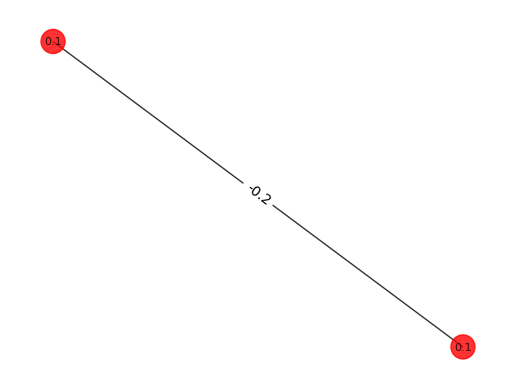

In [5]:
colors = ["r" for node in G.nodes()]
Gpos = nx.spring_layout(G)

draw_graph(G,colors,Gpos)

In [6]:
dict(G.nodes(data='weight', default=1))

{0: 0.1, 1: 0.1}

In [7]:
nx.get_node_attributes(G, "weight")

{0: 0.1, 1: 0.1}

In [8]:
nx.get_edge_attributes(G, "weight")

{(0, 1): -0.2}